# Preliminary data preprocessing

## Load data

In [83]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pandasql import sqldf
%matplotlib inline
import seaborn
from IPython.display import Image

df = pd.read_csv("deezer.csv", thousands=',')

## Group by cohort and planet and sum

In [2]:
grouped = df.groupby(['Cohort', 'Planet']).aggregate(np.sum).reset_index()

In [3]:
grouped.head()

,Cohort,Planet,M0,M1,M2,M3,M4,M5,M6,M7,...,M13,M14,M15,M16,M17,M18,M19,M20,M21,M22
0,April-13,Earth,158228,141568,132076,125972,122304,118398,111846,109802,...,93632,91784,90034,88634,86394,82334,80234,0,0,0
1,April-13,Jupiter,8034,6578,5850,5577,5551,5330,5226,5252,...,4563,4472,4173,4121,4069,3861,3861,0,0,0
2,April-13,Mars,14952,12082,10794,9926,9310,8470,8078,7994,...,6566,6426,6370,6244,5964,5656,5614,0,0,0
3,April-13,Saturn,50256,42264,39195,36720,34920,33201,31923,30870,...,23778,23139,22590,22248,21636,20700,20106,0,0,0
4,April-13,Venus,11840,10300,9560,9450,8950,8680,8480,8220,...,7080,6910,6570,6310,6230,5920,5920,0,0,0


In [73]:
# same thing using sql syntax
sql_table = sqldf("SELECT Cohort, Planet, sum(M0), sum(M1) FROM df group by Cohort,Planet;", globals()).head()

## Reformat so that Cohort column is properly formated as a date

In [5]:
grouped.Cohort = pd.to_datetime(grouped.Cohort, format="%B-%y")

In [82]:
data = grouped.sort_values(by='Cohort')
data.head(2)

,Cohort,Planet,M0,M1,M2,M3,M4,M5,M6,M7,...,M13,M14,M15,M16,M17,M18,M19,M20,M21,M22
35,2013-01-01,Earth,127020,111528,102456,97512,94140,90432,86124,84732,...,72144,70368,68052,65628,64332,63360,62304,60876,58320,57084
36,2013-01-01,Jupiter,1617,1298,1144,1089,1034,935,880,836,...,726,715,693,693,627,616,649,638,594,616


# Responses to dashboard project
# 1. Subscribers

### Questions
- Which planet had the most subscribers sign up for the trial in 2013? 
- In 2014 (through November)? 
- Which planet grew trial subscribers the most?

In [67]:
d13 = data[data.Cohort.dt.year == 2013]
total13 = d13.groupby(d13.Planet).aggregate(np.sum).M0
print total13

Planet
Earth      1663730
Jupiter     239784
Mars        354209
Saturn     1076536
Venus       454393
Name: M0, dtype: int64


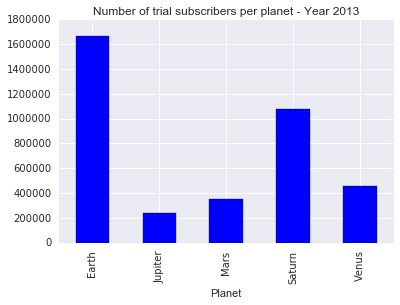

In [70]:
total13.plot(kind='bar')
plt.title("Number of trial subscribers per planet - Year 2013")

###### Question:
Which planet had the most subscribers sign up for the trial in 2013? 
###### Response:
For year 2013 column M0 (signed up for trial in given month) is the highest on **planet earth**

Planet
Earth      1576911
Jupiter     237706
Mars        651293
Saturn     1498415
Venus      1190503
Name: M0, dtype: int64


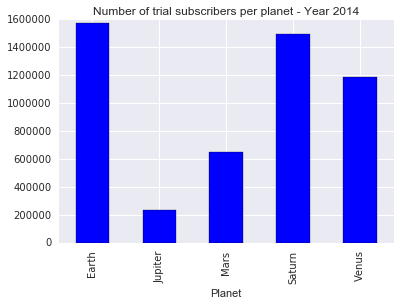

In [71]:
d14 = data[data.Cohort.dt.year == 2014]
total14 = d14.groupby(d14.Planet).aggregate(np.sum).M0
total14.plot(kind='bar')
plt.title("Number of trial subscribers per planet - Year 2014")
print total14

###### Question:
- Which planet had the most subscribers sign up for the trial in 2014? 

###### Response:
- **earth** has the highest total number of subscribers in 2014

Planet
Earth      -86819
Jupiter     -2078
Mars       297084
Saturn     421879
Venus      736110
Name: M0, dtype: int64


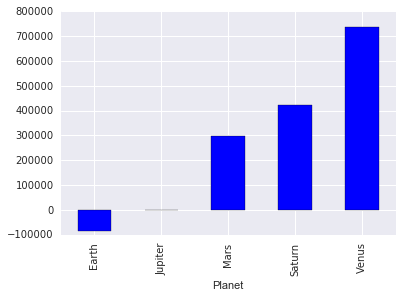

In [44]:
increase = total14-total13
print increase
increase.plot(kind='bar')

#### Question:
- Which planet grew trial subscribers the most?

#### Response:
- **Venus** grew more subscribers (+736110 users in a year)

# 2. & 3. Conversion rate

## Questions
- From January 2013 to November 2014, what was the conversion rate from trial to 1st month’s payment for each planet?
- (not in the data) What are some factors that could cause the conversion rate to differ between 2 planets?  (2-3 examples)
- As a paid subscription service, conversion from trial to paid is obviously a very important metric. What kind of dashboard would you create that would dfdemonstrate this KPI for senior leaders at the company? Provide an example using the data provided.


In [48]:
cv = data.groupby('Planet').aggregate(np.sum)
cv.head()

,M0,M1,M2,M3,M4,M5,M6,M7,M8,M9,...,M13,M14,M15,M16,M17,M18,M19,M20,M21,M22
Planet,,,,,,,,,,,,,,,,,,,,,
Earth,3240641,2741030,2486102,2199756,2042326,1894257,1753605,1608604,1478768,1328461,...,818269,736580,639363,542880,455378,372263,270047,184822,124607,57084
Jupiter,477490,395295,351255,317290,286958,263848,238269,208515,186782,162482,...,85029,65811,56150,42232,25362,15386,8606,4576,1962,616
Mars,1005502,811449,740690,614625,522103,460286,402023,321164,287702,243854,...,102197,78845,65211,49407,30613,21046,14101,8242,4534,1608
Saturn,2574951,2063540,1812345,1545472,1349886,1215759,1083886,951781,848821,743503,...,382707,318715,272854,224248,168266,118961,76705,54800,30464,10406
Venus,1644896,1408535,1264727,1118598,997886,880487,782663,644235,544037,417050,...,157400,104775,78140,57267,36120,21988,11837,5639,2658,40


#### Question:
From January 2013 to November 2014, what was the conversion rate from trial to 1st month’s payment for each planet?
#### Response:
Conversion rate for each planet for 2013 and 2014 (c.f. below):

In [79]:
rate = cv.M1/cv.M0
print rate

Planet
Earth      0.845830
Jupiter    0.827860
Mars       0.807009
Saturn     0.801390
Venus      0.856306
dtype: float64


#### Question:
- (not in the data) What are some factors that could cause the conversion rate to differ between 2 planets? (2-3 examples)

#### Response:
many factors could influence the conversion rate among them:
- **demographics**: some planets might be populated by inhabitants with lower income
- **marketing**: marketing might need to be individualized to specific planets to take into account idiosyncrasies of specific planet's cultures
- the lack of air on some planets might prevent the propagation of audible sound ;-)

##### Question:
As a paid subscription service, conversion from trial to paid is obviously a very important metric. What kind of dashboard would you create that would dfdemonstrate this KPI for senior leaders at the company? Provide an example using the data provided.

##### Response:
Visualization of conversion rate for each planet (dashboard):

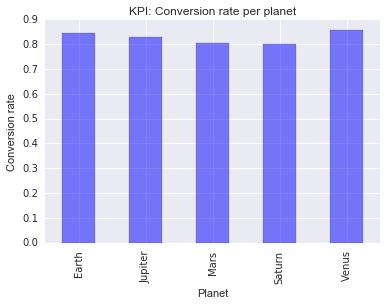

In [78]:
rate.plot(kind='bar', alpha=0.5)
plt.title("KPI: Conversion rate per planet")
plt.ylabel("Conversion rate")

# 4. Churn

#### Question:
After conversion, the next key metric for us is churn which informs customer lifetime value (LTV). The textbook answer to how churn relates to LTV is LTV = (1/churn) * gross margin. In our case, why can’t we use this methodology to calculate LTV?

#### Response:
We have no information on the cost associated with the customer relationship (e.g. retention spending) so we cannot compute margin

# 5. Engagement

##### Question:
It’s obviously very important that we keep a pulse on key metrics like subscriber growth, conversion and churn. We also keep a close watch on user engagement. There are many ways to measure engagement, but the most important for us is # of tracks streamed.  This being the case, how would you design a dashboard that would best provide a snapshot of this metric? Feel free to use fake numbers to demonstrate.

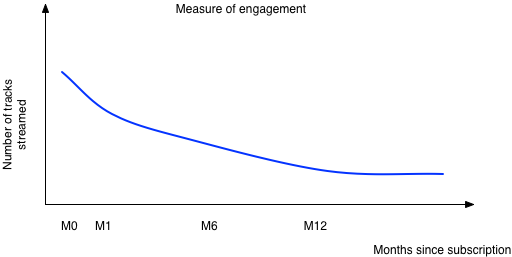

In [85]:
Image("engagement.png")

# 6. Segmentation
#### Questions:
Now let’s say we wanted to do a segmentation based on tracks streamed. What are some ways you might segment our subscribers based on this metric? (2-3 examples)

#### Response:
We could segment by e.g. :
- < 10 songs a month, < 10 songs a week, < 10 songs a day, >10 songs day
- 